In [9]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # For creating plots
import matplotlib.ticker as mtick # For specifying the axes tick format 
import matplotlib.pyplot as plt

sns.set(style = 'white')

## Display all the columns of the dataframe

pd.pandas.set_option('display.max_columns',None)

In [10]:
tel = pd.read_csv('telco churn.csv')

In [11]:
tel.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [12]:
tel.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [13]:
tel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


The data set includes information about:

* Customers who left within the last month – the column is called Churn

* Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies

* Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges

* Demographic info about customers – gender, age range, and if they have partners and dependents

## Data processing

* 1. Convert Data Types

In [14]:
# Converting Total Charges to a numerical data type.
tel.TotalCharges = pd.to_numeric(tel.TotalCharges, errors='coerce')
tel.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

#Convertin the predictor variable in a binary numeric variable
tel['Churn'].replace(to_replace='Yes', value=1, inplace=True)
tel['Churn'].replace(to_replace='No',  value=0, inplace=True)

* Check the Data set is balanced or not based on target values in classification

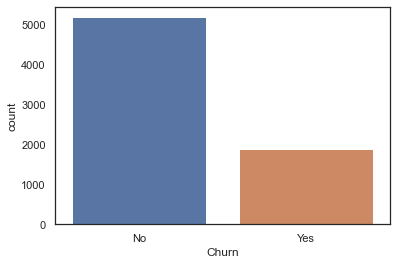

In [15]:
#total patient count based on cardio_results
sns.countplot(x='Churn',data=tel)
plt.show()

Take away: target variable is a bit imbalanced

* 2. Handling Missing Values

In [16]:
# find missing values
features_na = [features for features in tel.columns if tel[features].isnull().sum() > 0]

for feature in features_na:
    print(feature, np.round(tel[feature].isnull().mean(), 4) * 100,  ' % missing values')
else:
    print("No missing value found")

TotalCharges 0.16  % missing values
No missing value found


##### If there are missing values, below code checks relationship between missing vals and target var
for feature in features_with_na:
    data = dataset.copy()
    
    # let's make a variable that indicates 1 if the observation was missing or zero otherwise
    data[feature] = np.where(data[feature].isnull(), 1, 0)
    
    # let's calculate the mean SalePrice where the information is missing or present
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.title(feature)
    plt.show()
    
Here With the relation between the missing values and the dependent variable is clearly visible.So We need to replace these nan values with something meaningful which we will do in the Feature Engineering section

In [17]:
## drop nulls

tel.dropna(inplace = True)

In [18]:
tel.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

* 3. Explore categorical vars

In [19]:
tel = tel.drop('customerID', axis = 1)

In [20]:
for col in tel.select_dtypes(include = 'object').columns:
    print(col)
    print(tel[col].unique())

gender
['Female' 'Male']
Partner
['Yes' 'No']
Dependents
['No' 'Yes']
PhoneService
['No' 'Yes']
MultipleLines
['No phone service' 'No' 'Yes']
InternetService
['DSL' 'Fiber optic' 'No']
OnlineSecurity
['No' 'Yes' 'No internet service']
OnlineBackup
['Yes' 'No' 'No internet service']
DeviceProtection
['No' 'Yes' 'No internet service']
TechSupport
['No' 'Yes' 'No internet service']
StreamingTV
['No' 'Yes' 'No internet service']
StreamingMovies
['No' 'Yes' 'No internet service']
Contract
['Month-to-month' 'One year' 'Two year']
PaperlessBilling
['Yes' 'No']
PaymentMethod
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn
['No' 'Yes']


In [21]:
## Get all categorical features
cat_features = [feature for feature in tel.columns if tel[feature].dtype == 'O']
cat_features

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

In [22]:
for feature in cat_features:
    print('{}: {} categories'.format(feature, len(tel[feature].unique())))

gender: 2 categories
Partner: 2 categories
Dependents: 2 categories
PhoneService: 2 categories
MultipleLines: 3 categories
InternetService: 3 categories
OnlineSecurity: 3 categories
OnlineBackup: 3 categories
DeviceProtection: 3 categories
TechSupport: 3 categories
StreamingTV: 3 categories
StreamingMovies: 3 categories
Contract: 3 categories
PaperlessBilling: 2 categories
PaymentMethod: 4 categories
Churn: 2 categories


In [23]:
# Encode categorical vars
df = tel.copy()
for col in cat_features:
    df = pd.concat([df.drop(col, axis=1),pd.get_dummies(df[col], prefix=col, prefix_sep='_',drop_first=True, dummy_na=False)], axis=1)
    
    
## Rename Churn col

df.rename(columns = {'Churn_Yes':'Churn'}, inplace = True)

In [24]:
df.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn
0,0,1,29.85,29.85,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
1,0,34,56.95,1889.50,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0
2,0,2,53.85,108.15,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1
3,0,45,42.30,1840.75,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0
4,0,2,70.70,151.65,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1


* 4. Find Categorical Feature Distribution

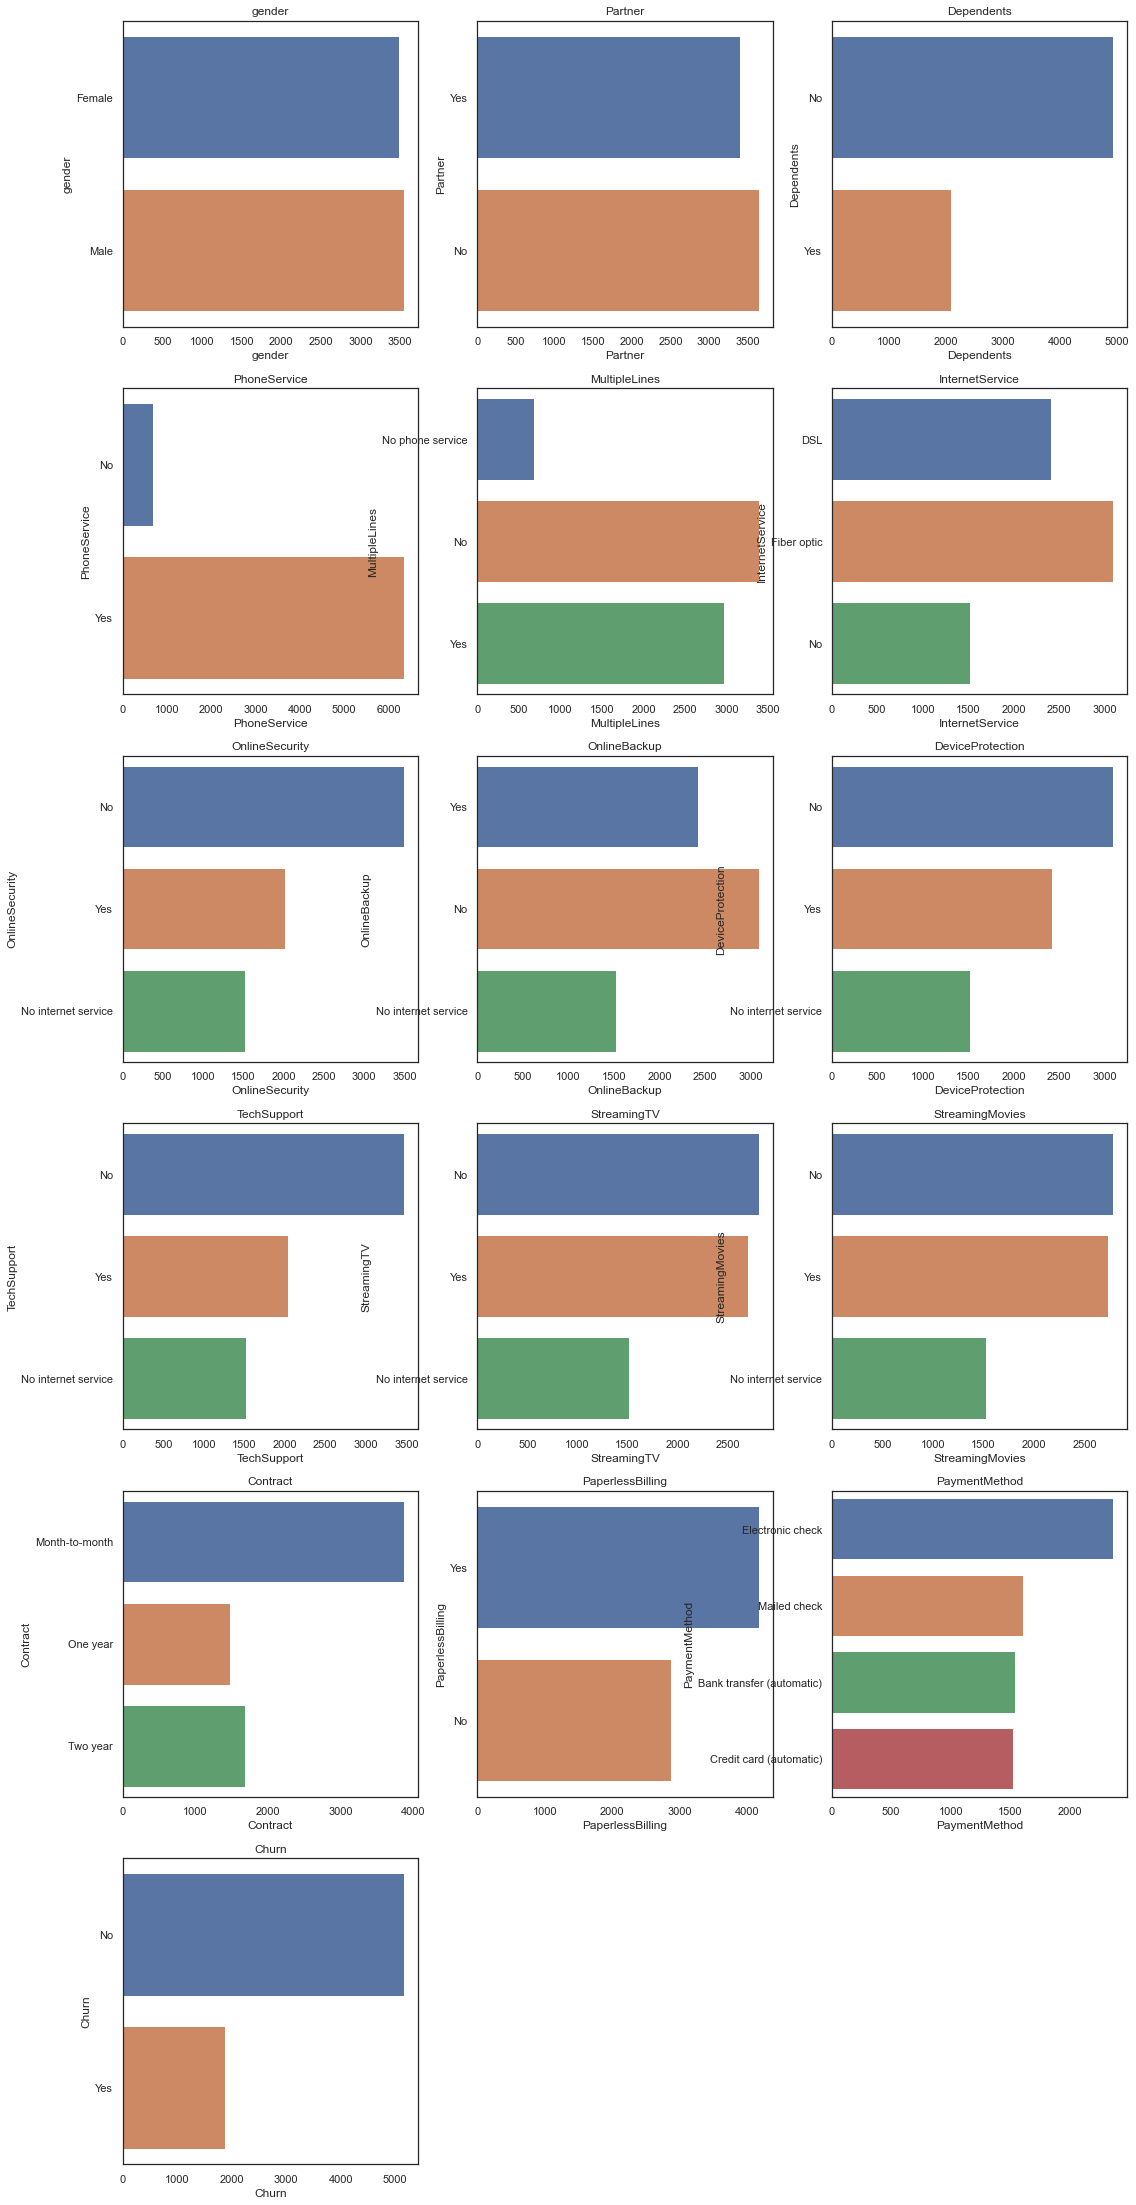

In [25]:
#check count based on categorical features
plt.figure(figsize=(18,80), facecolor='white')
plotnumber =1
for feature in cat_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.countplot(y=feature,data=tel)
    plt.xlabel(feature)
    plt.title(feature)
    plotnumber+=1
plt.show()

* 5. Relationship between Categorical Features and Label

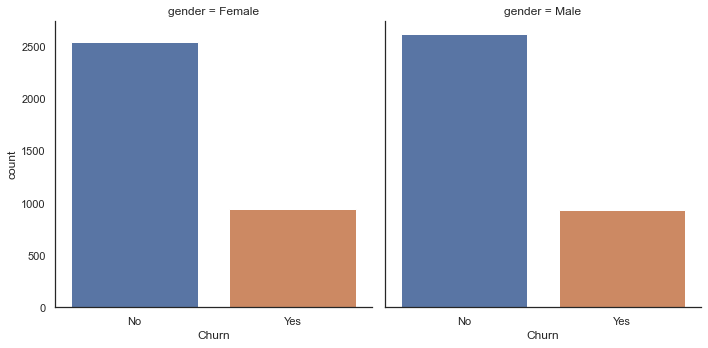

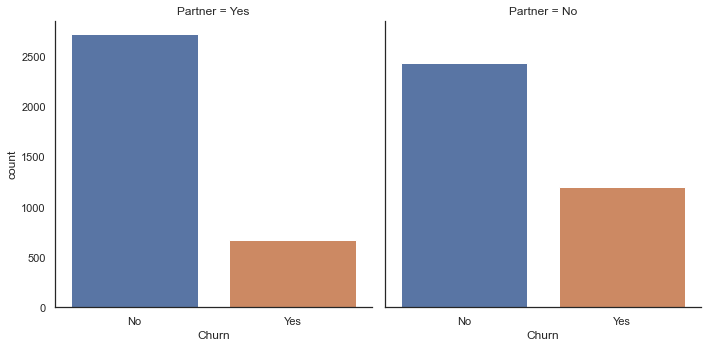

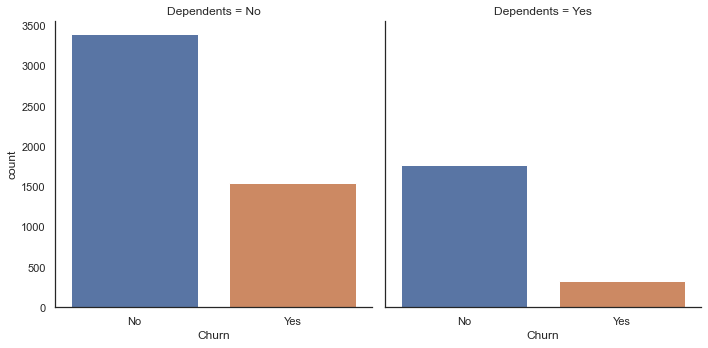

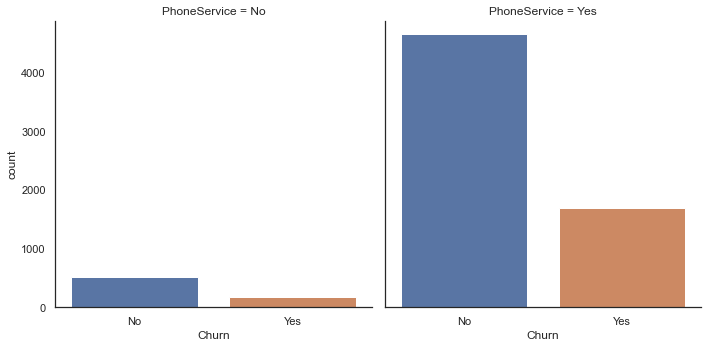

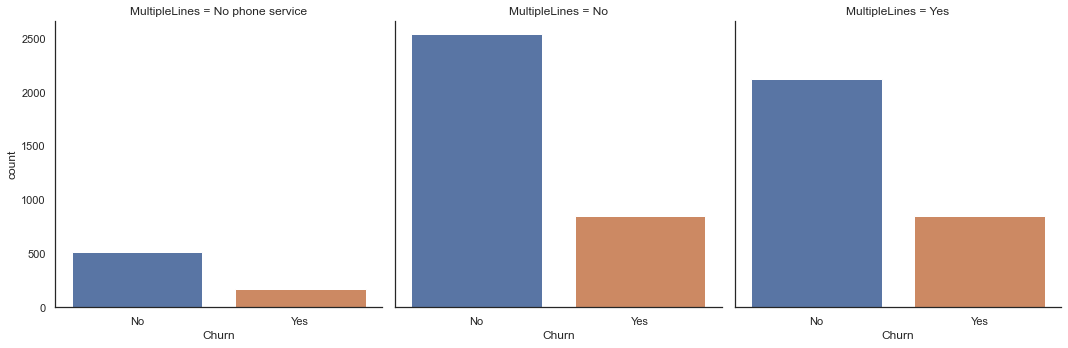

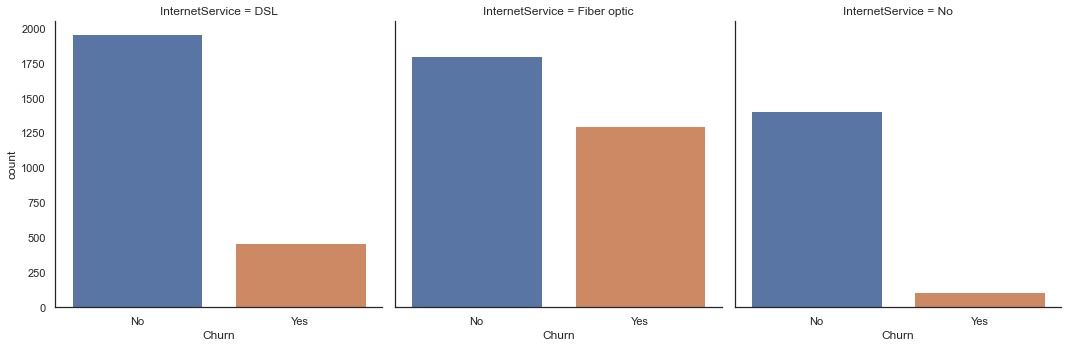

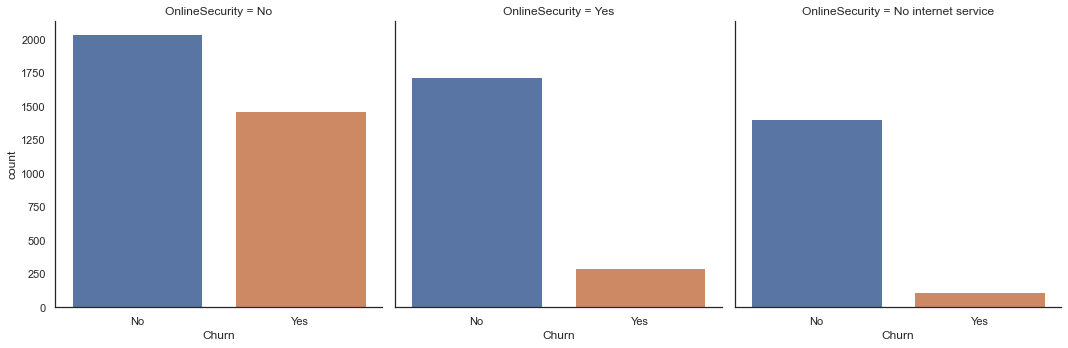

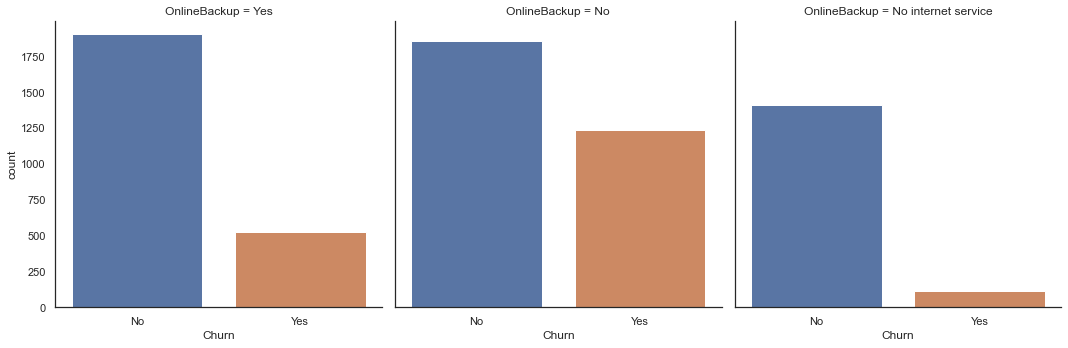

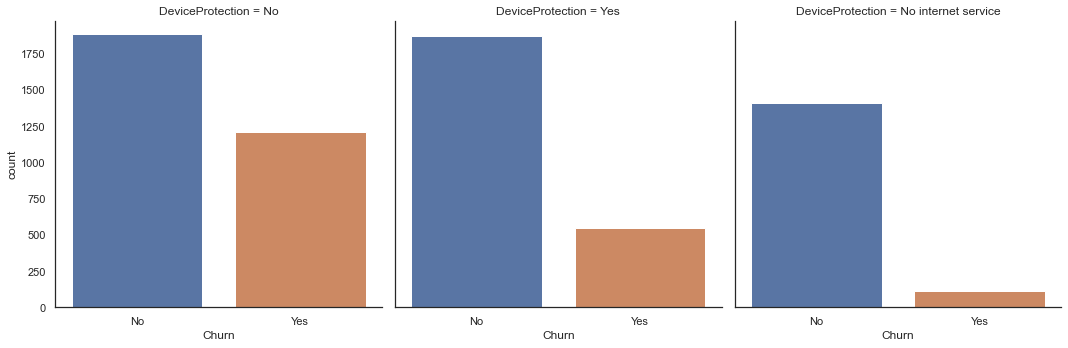

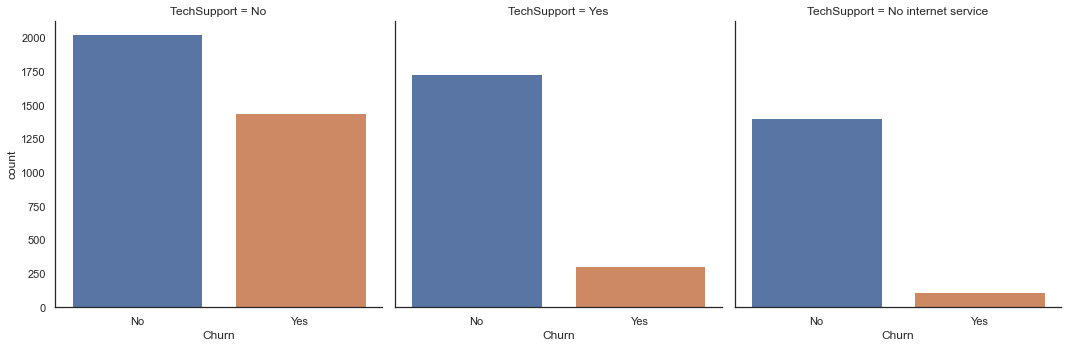

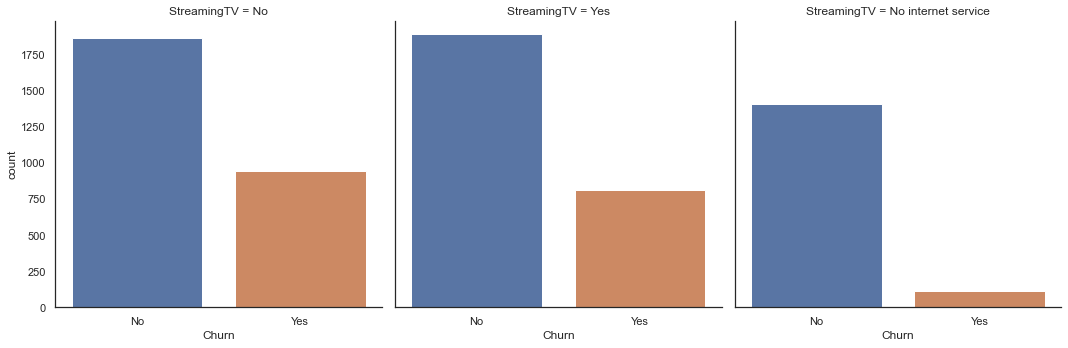

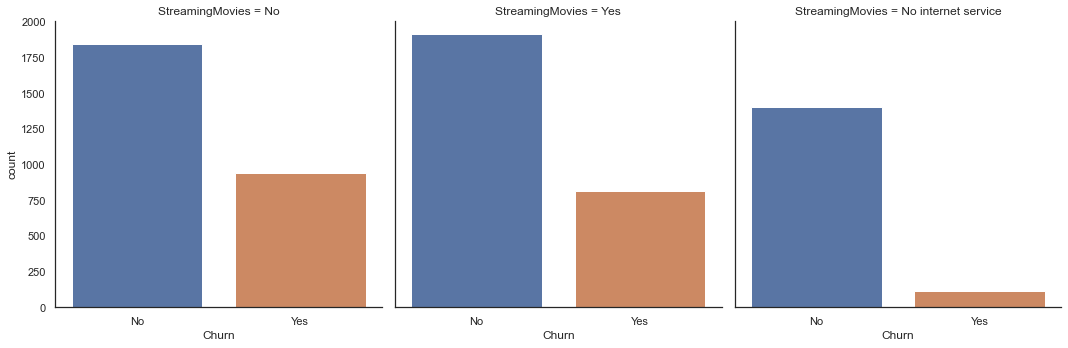

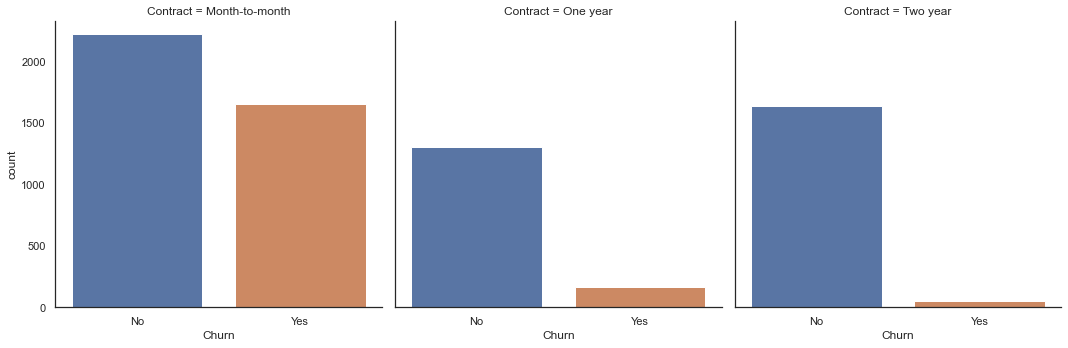

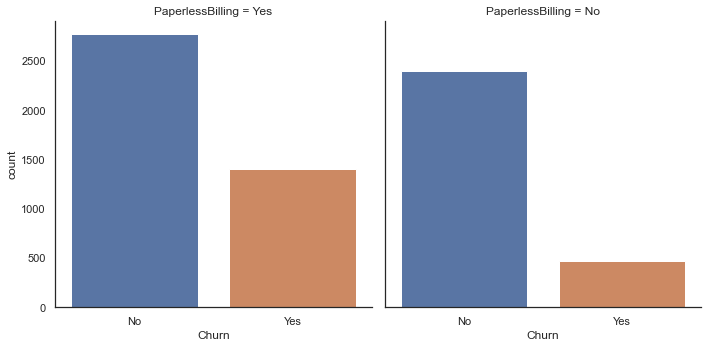

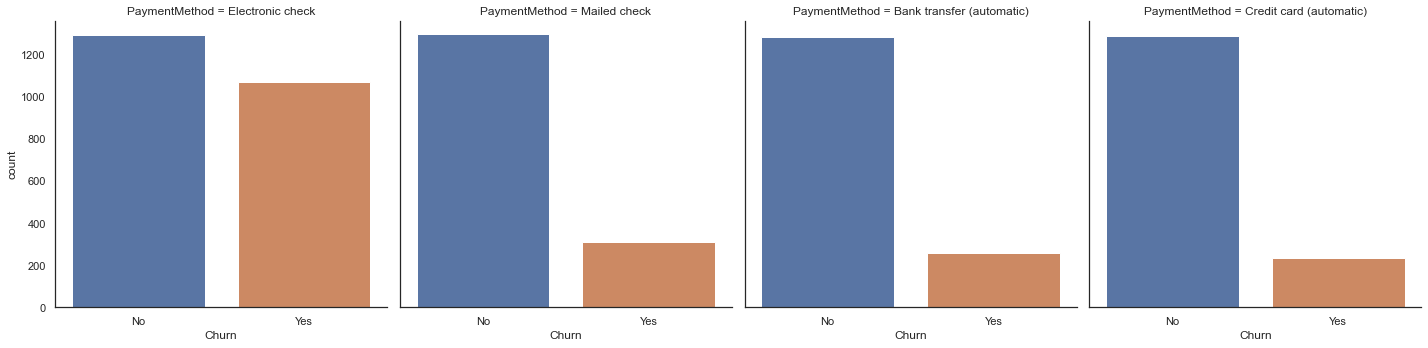

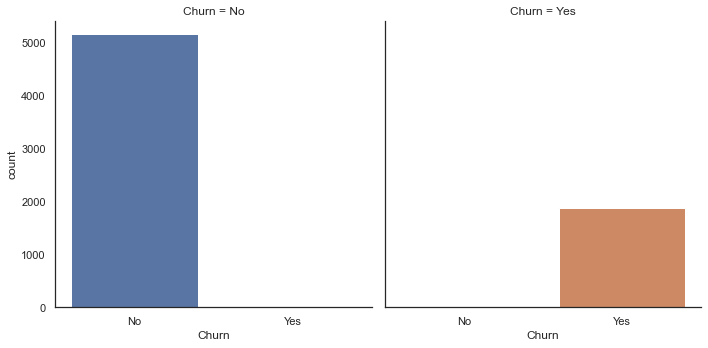

In [26]:
#check target label split over categorical features
#Find out the relationship between categorical variable and dependent variable
for categorical_feature in cat_features:
    sns.catplot(x='Churn', col=categorical_feature, kind='count', data= tel)
plt.show()

In [27]:
#Check target label split over categorical features and find the count
for categorical_feature in cat_features:
    print(tel.groupby(['Churn',categorical_feature]).size())

Churn  gender
No     Female    2544
       Male      2619
Yes    Female     939
       Male       930
dtype: int64
Churn  Partner
No     No         2439
       Yes        2724
Yes    No         1200
       Yes         669
dtype: int64
Churn  Dependents
No     No            3390
       Yes           1773
Yes    No            1543
       Yes            326
dtype: int64
Churn  PhoneService
No     No               510
       Yes             4653
Yes    No               170
       Yes             1699
dtype: int64
Churn  MultipleLines   
No     No                  2536
       No phone service     510
       Yes                 2117
Yes    No                   849
       No phone service     170
       Yes                  850
dtype: int64
Churn  InternetService
No     DSL                1957
       Fiber optic        1799
       No                 1407
Yes    DSL                 459
       Fiber optic        1297
       No                  113
dtype: int64
Churn  OnlineSecurity     
No     

Key take-away
1. Gender doesn't seem to impact churn
2. Customers with partners/dependents seem to churn less
3. customers with phone service churn more
4. multiple line or not doesn't seem to impact much
5. Customers with fibor optics churn more
6. Customers without online security churn more
7. Customers without online back up or device protection or tech support churn more
8. month-to-month churn more
9. paperless billing churn more

* Explore Numerical Features

In [28]:
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']
print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
df[numerical_features].head()

Number of numerical variables:  31


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn
0,0,1,29.85,29.85,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
1,0,34,56.95,1889.50,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0
2,0,2,53.85,108.15,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1
3,0,45,42.30,1840.75,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0
4,0,2,70.70,151.65,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1


* Find Discrete Numerical Features

In [29]:
discrete_feature=[feature for feature in numerical_features if len(df[feature].unique())<25]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 28


* Find Continuous Numerical Features

In [30]:
continuous_features=[feature for feature in numerical_features if feature not in discrete_feature+['Churn']]
print("Continuous feature Count {}".format(len(continuous_features)))

Continuous feature Count 3


* Relation between discrete numerical Features and Labels

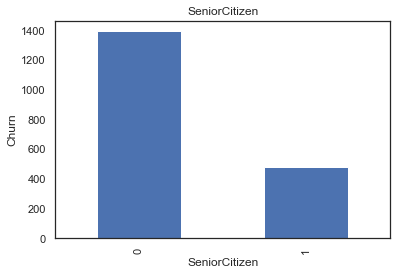

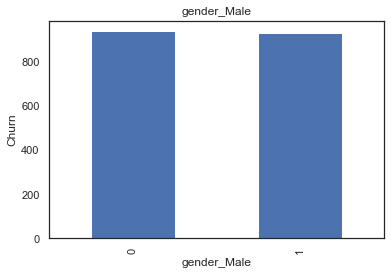

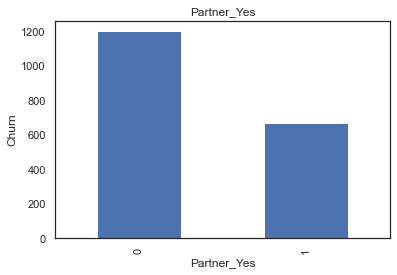

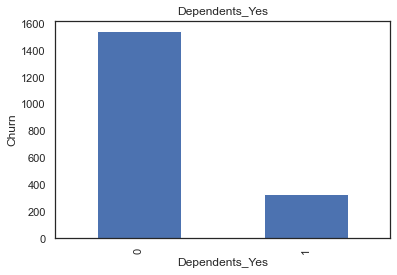

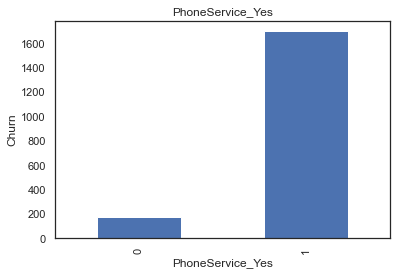

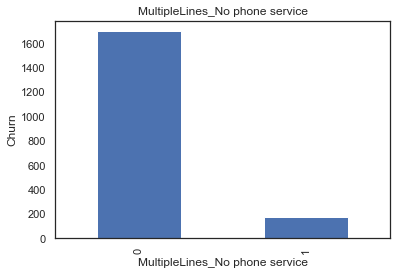

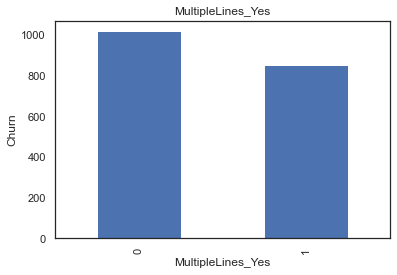

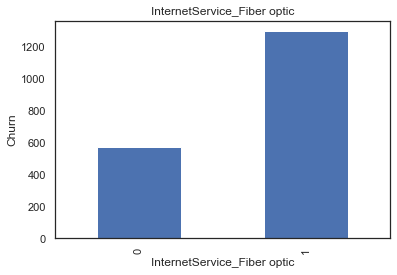

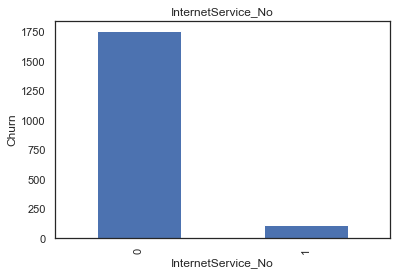

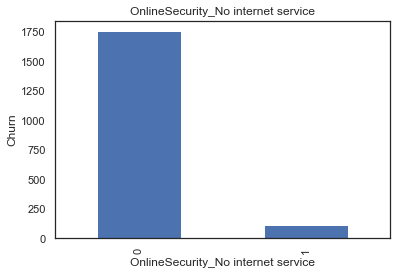

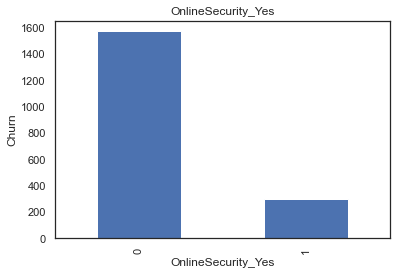

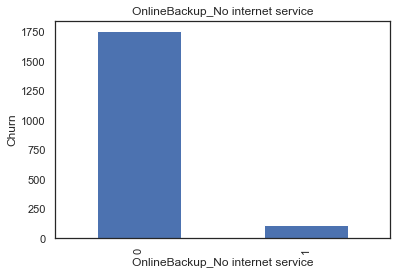

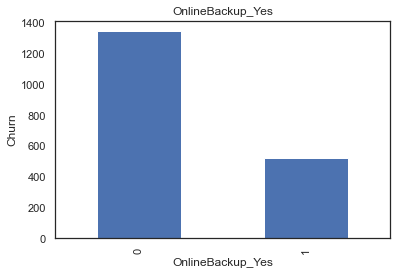

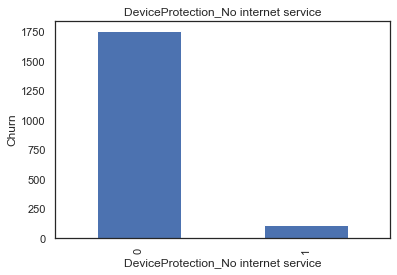

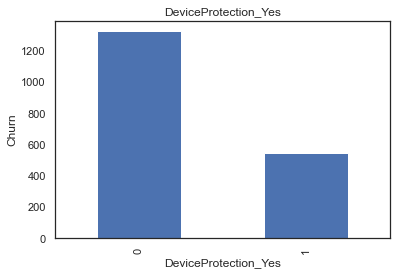

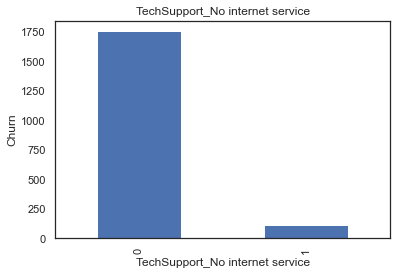

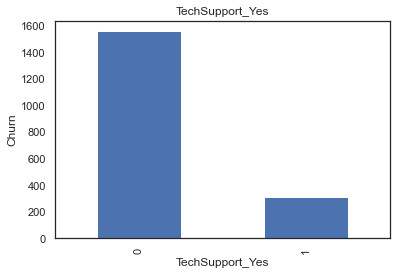

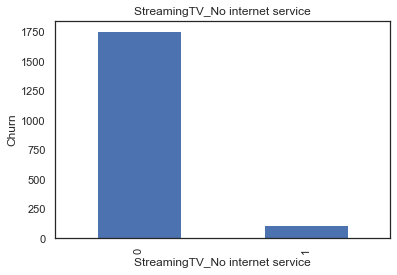

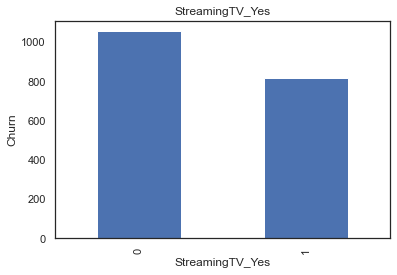

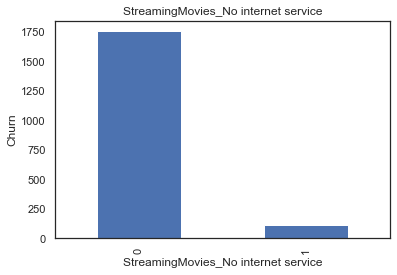

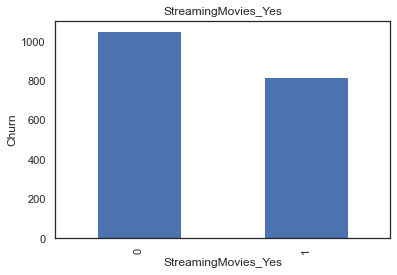

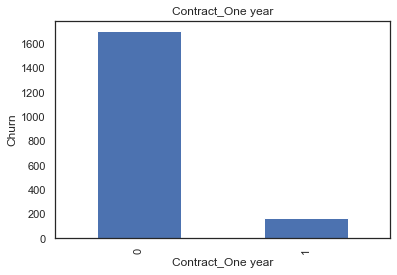

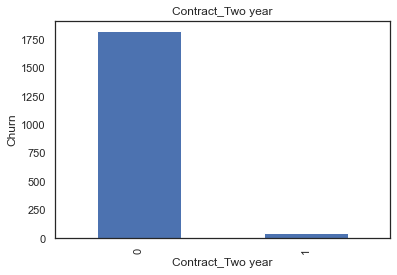

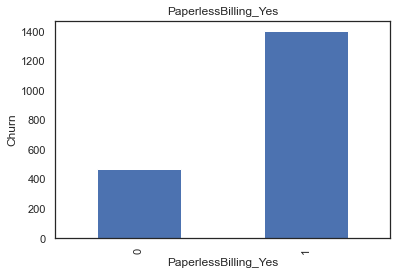

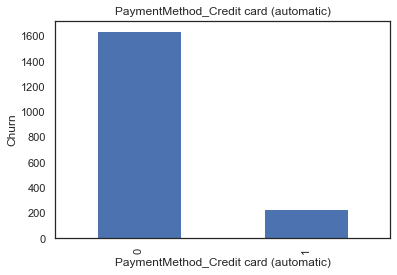

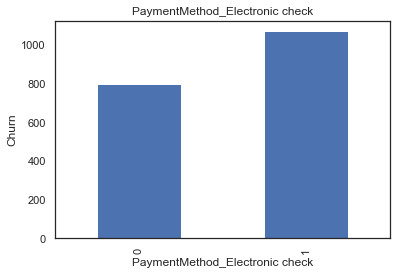

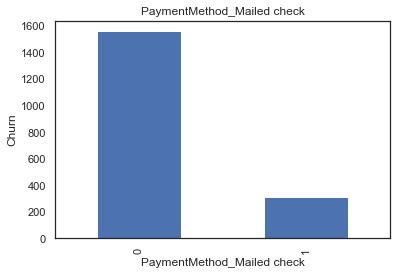

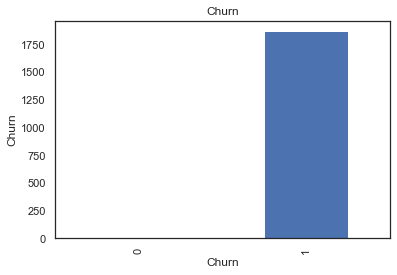

In [31]:
for feature in discrete_feature:
    df.groupby(feature)['Churn'].sum().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('Churn')
    plt.title(feature)
    plt.show()

* Distribution of Continous Numerical Features

C:\Users\weiting_yu\Anaconda3new\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\weiting_yu\Anaconda3new\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\weiting_yu\Anaconda3new\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or

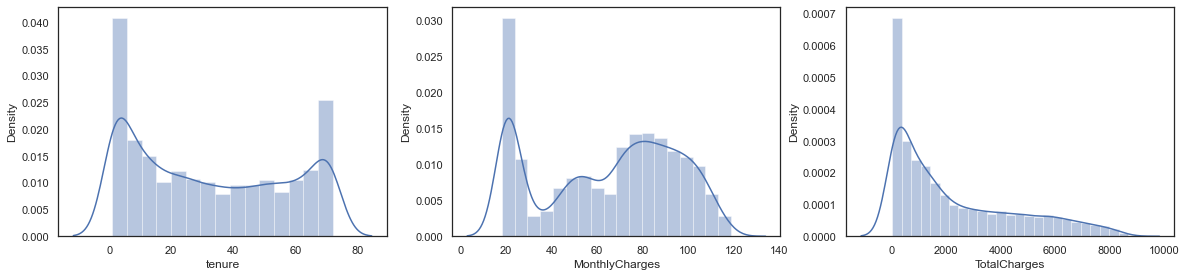

In [32]:
#plot a univariate distribution of continues observations
plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for continuous_feature in continuous_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.distplot(df[continuous_feature])
    plt.xlabel(continuous_feature)
    plotnumber+=1
plt.show()

* logarithmic transformation

##### We will be using logarithmic transformation


for feature in continuous_features:
    data = df.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        sns.distplot(data[feature])
        plt.xlabel(feature)
        plt.ylabel('Churn')
        plt.title(feature)
        plt.show()

https://github.com/krishnaik06/Advanced-House-Price-Prediction-/blob/master/Exploratory%20Data%20Analysis%20Part%201.ipynb

* Relation between Continous numerical Features and Labels

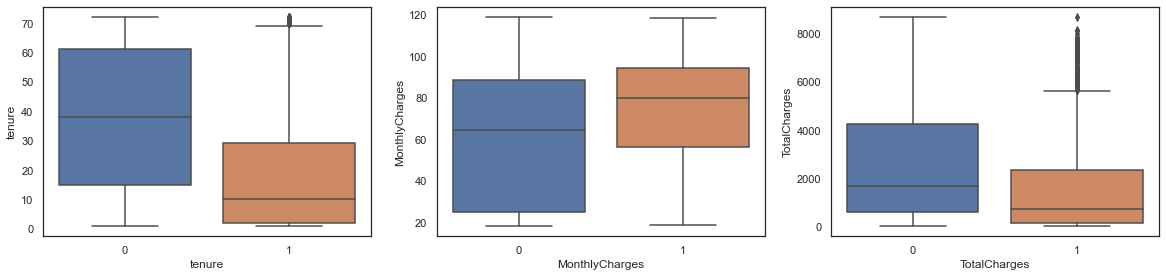

In [33]:
#boxplot to show target distribution with respect numerical features
plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for feature in continuous_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.boxplot(x="Churn", y= df[feature], data=df)
    plt.xlabel(feature)
    plotnumber+=1
plt.show()

Key takeaways:    1. Customers who churned have shorter tenure, higher monthly charge and lower total charges
    

* Find Outliers in numerical features

https://www.kaggle.com/code/nareshbhat/outlier-the-silent-killer

C:\Users\weiting_yu\Anaconda3new\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\weiting_yu\Anaconda3new\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\weiting_yu\Anaconda3new\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\User

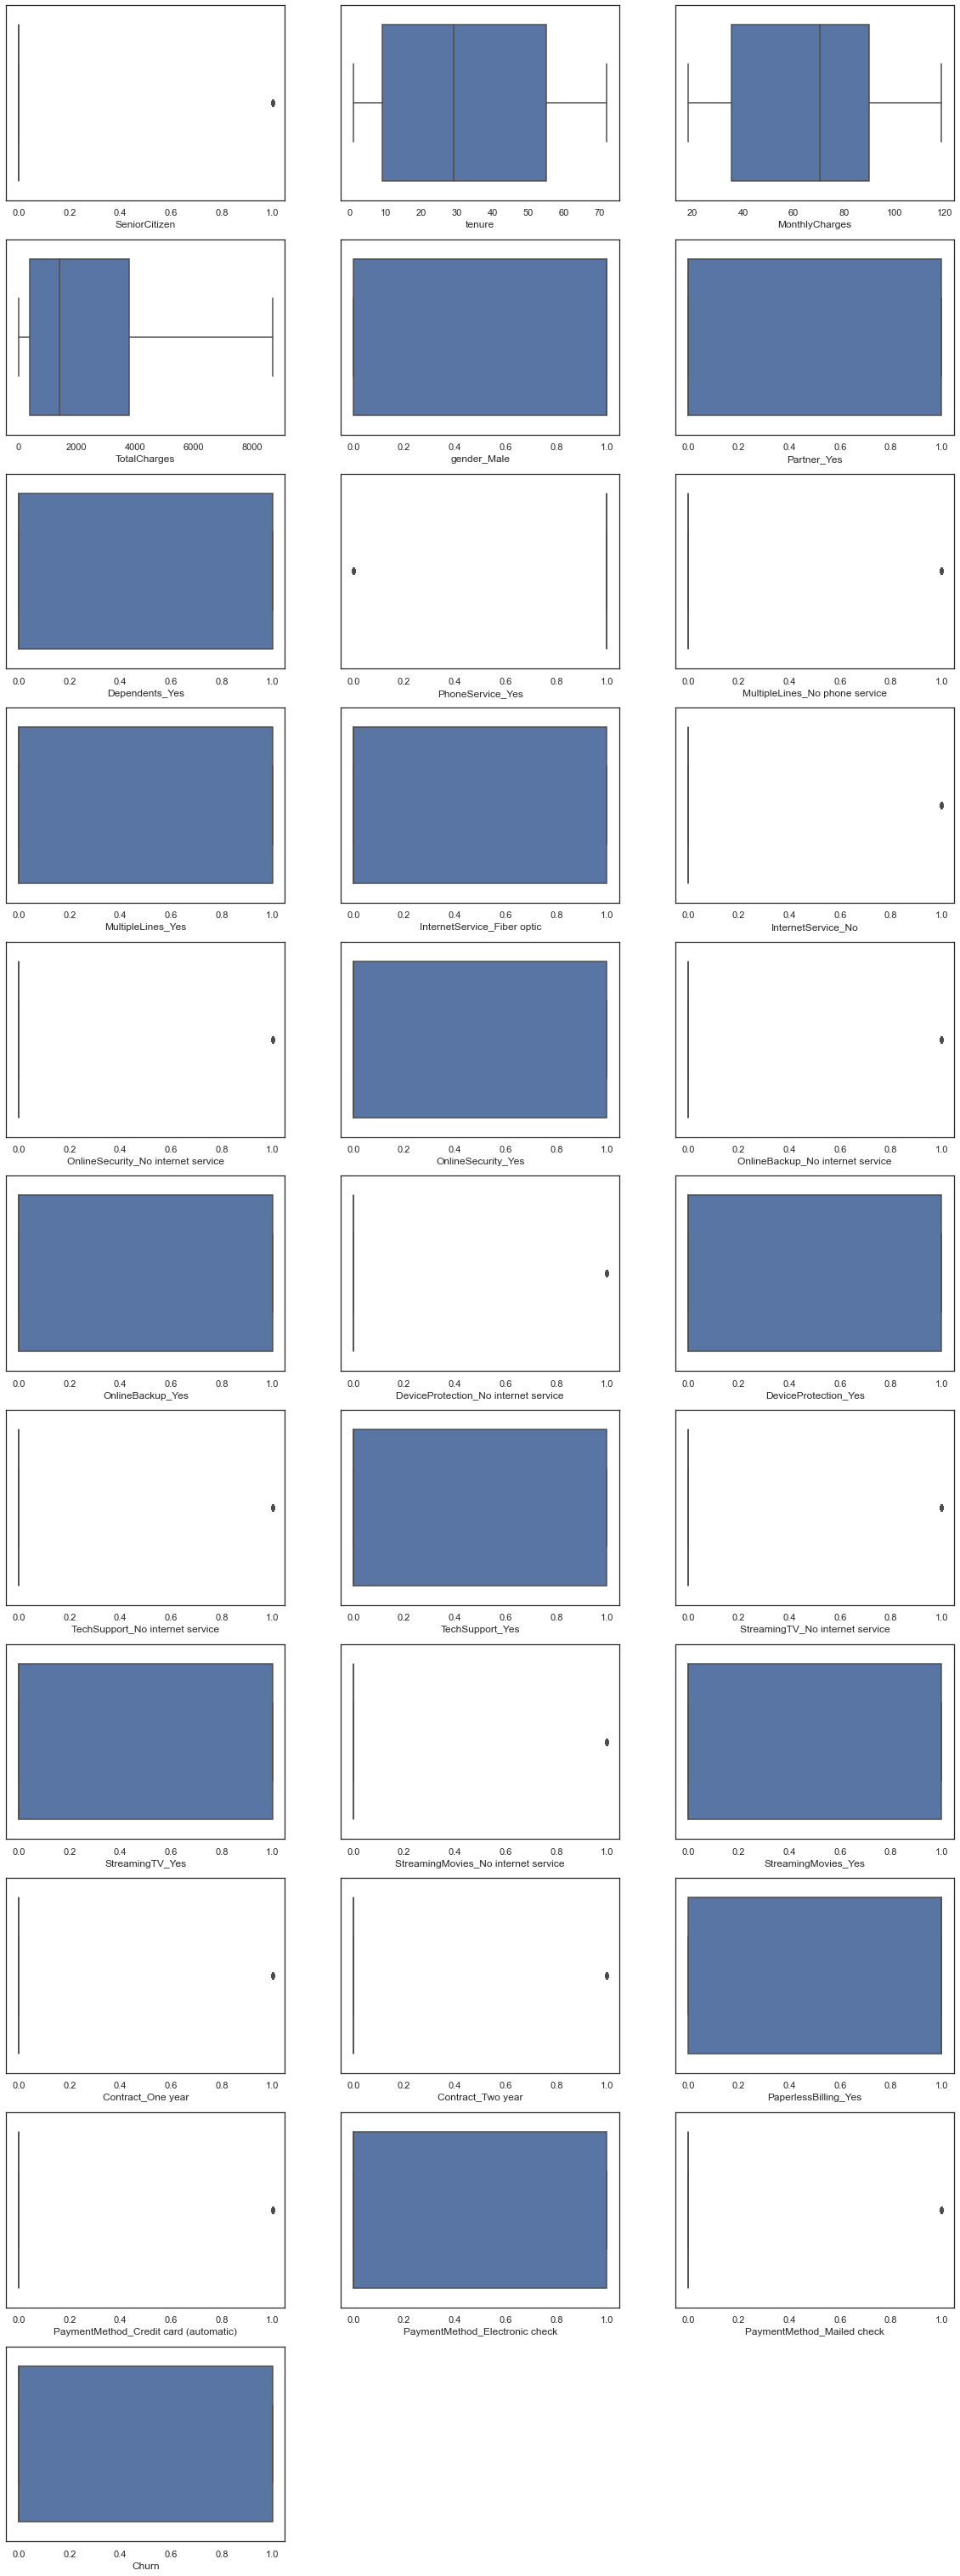

In [34]:
#boxplot on numerical features to find outliers
plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for numerical_feature in numerical_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.boxplot(df[numerical_feature])
    plt.xlabel(numerical_feature)
    plotnumber+=1
plt.show()

no outliers identified

* Explore the Correlation between numerical features

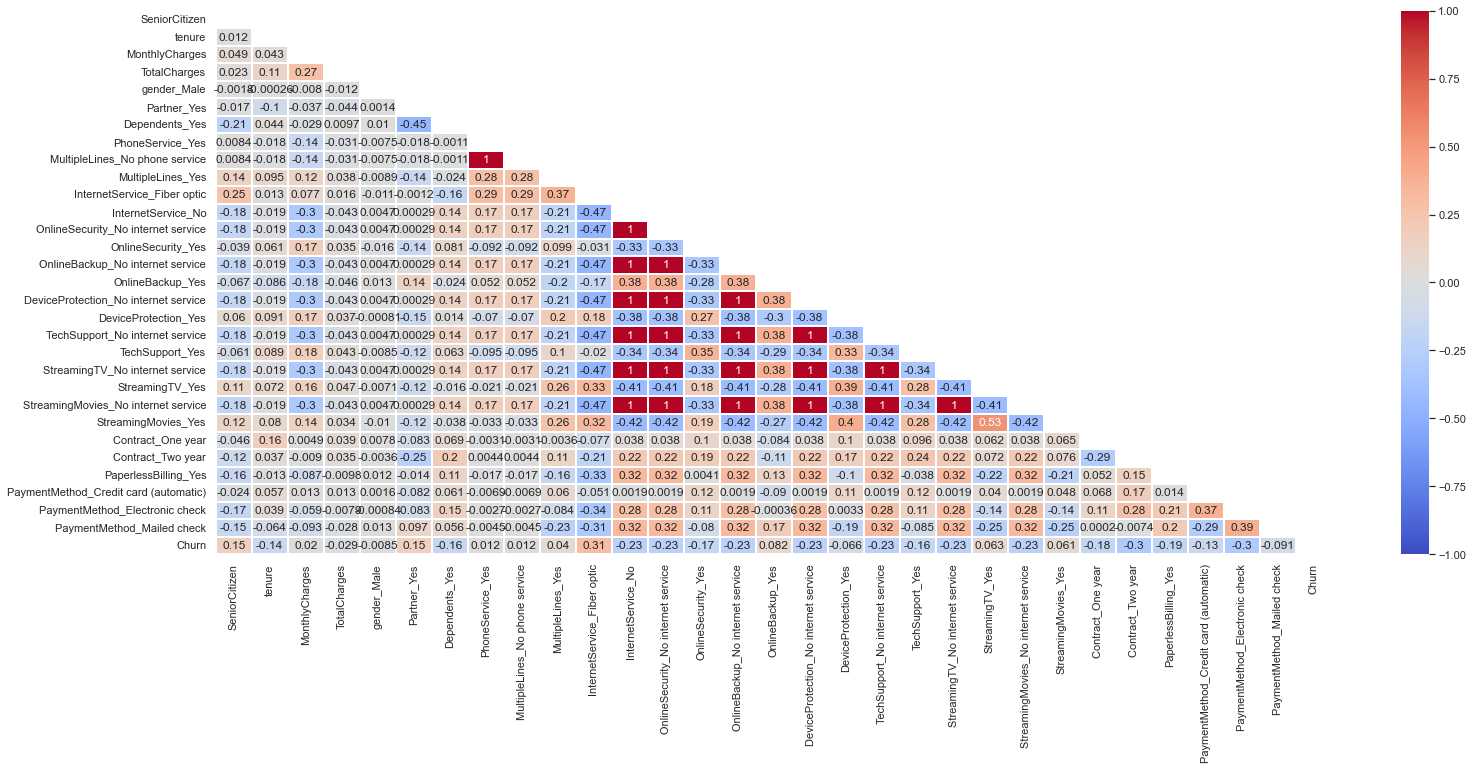

In [35]:
plt.figure(figsize=(25, 10))

corr = df.apply(lambda x: pd.factorize(x)[0]).corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

ax = sns.heatmap(corr, mask=mask, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, linewidths=.2, cmap='coolwarm', vmin=-1, vmax=1)

<AxesSubplot:>

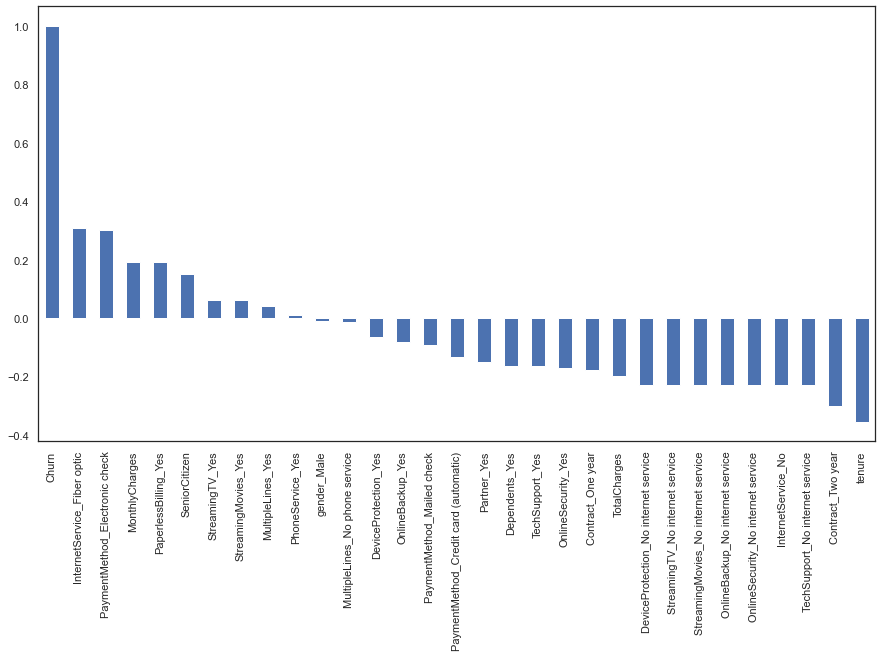

In [36]:
#Get Correlation of "Churn" with other variables:
plt.figure(figsize=(15,8))
df.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

takeaway: internet servic, monthly charges

## Feature Engineering

* Drop unwanted Features

* Handle Missing Values

* Handle Categorical Features

* Handle Feature Scalling

* Remove Outliers

* Handling Temporal Variables(Eg: Datetime Variables)
* Extract year, month from date col

## Split data into training and test

In [37]:
X = df.drop('Churn', axis = 1)
y = df['Churn']
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [38]:
len(X_train)

5625

In [39]:
len(X_test)

1407

## Feature Engineering

* Drop unwanted Features

* Handle Missing Values

* Handle Categorical Features

* Handle Feature Scalling

* Remove Outliers

In [40]:
# Feature Scaling
    
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = pd.DataFrame(scaler.transform(X_train), index = X_train.index, columns = X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), index = X_test.index, columns = X_test.columns)

## Model Selection

In [41]:
### We will develop Logistic Regression, Random Forest, SVM, ADA Boost and XG Boost
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC  
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report, confusion_matrix  
from sklearn.model_selection import GridSearchCV

In [42]:
## Random Forest

In [43]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(n_estimators=1000 , oob_score = True, n_jobs = -1,
                                  random_state =50, max_features = "auto",
                                  max_leaf_nodes = 30)
model_rf.fit(X_train, y_train)

# Make predictions
prediction_test = model_rf.predict(X_test)

C:\Users\weiting_yu\Anaconda3new\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


<AxesSubplot:>

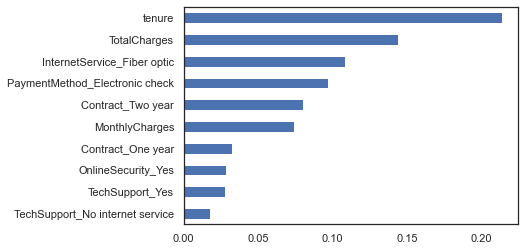

In [44]:
importances = model_rf.feature_importances_
weights = pd.Series(importances,
                 index=X.columns.values)
weights.sort_values()[-10:].plot(kind = 'barh')

* Observations:

* From random forest algorithm, monthly contract, tenure and total charges are the most important predictor variables to predict churn.
The results from random forest are very similar to that of the logistic regression and in line to what we had expected from our EDA

In [ ]:
### SVC

In [49]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix  

model.svm = SVC(kernel='linear') 
model.svm.fit(X_train,y_train)
preds = model.svm.predict(X_test)
accuracy_score(y_test, preds)

0.7974413646055437

In [47]:
# Create the Confusion matrix

print(confusion_matrix(y_test,preds))  

[[927 111]
 [174 195]]


from sklearn.model_selection import cross_val_score
model_score =cross_val_score(estimator=RandomForestClassifier(),X=X_train, y=y_train, cv=5)
print(model_score)
print(model_score.mean())

In [ ]:
### logistic regression

In [50]:
# Running logistic regression model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
result = model.fit(X_train, y_train)

In [51]:
from sklearn import metrics
prediction_test = model.predict(X_test)
# Print the prediction accuracy
print (metrics.accuracy_score(y_test, prediction_test))

0.8073916133617626


AxesSubplot(0.125,0.125;0.775x0.755)


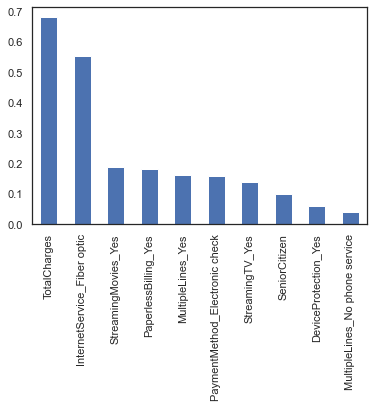

In [52]:
# To get the weights of all the variables
weights = pd.Series(model.coef_[0],
                 index=X.columns.values)
print (weights.sort_values(ascending = False)[:10].plot(kind='bar'))

* Observations

* We can see that some variables have a negative relation to our predicted variable (Churn), while some have positive relation. Negative relation means that likeliness of churn decreases with that variable. Let us summarize some of the interesting features below:

* As we saw in our EDA, having a 2 month contract reduces chances of churn. 2 month contract along with tenure have the most negative relation with Churn as predicted by logistic regressions
Having DSL internet service also reduces the proability of Churn
Lastly, total charges, monthly contracts, fibre optic internet services and seniority can lead to higher churn rates. This is interesting because although fibre optic services are faster, customers are likely to churn because of it. I think we need to explore more to better understad why this is happening.

In [ ]:
## adaboost

In [53]:
# AdaBoost Algorithm
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier()
# n_estimators = 50 (default value) 
# base_estimator = DecisionTreeClassifier (default value)
model.fit(X_train,y_train)
preds = model.predict(X_test)
metrics.accuracy_score(y_test, preds)

0.8088130774697939

In [54]:
##  XGBoost

In [55]:
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X_train, y_train)
preds = model.predict(X_test)
metrics.accuracy_score(y_test, preds)

0.7960199004975125

In [56]:
### XGBClassifier

model_score =cross_val_score(estimator=XGBClassifier(),X=X_train, y=y_train, cv=5)
print(model_score)
print(model_score.mean())

[0.79022222 0.77333333 0.78044444 0.79022222 0.78933333]
0.7847111111111112


## Pickle

In [57]:
import pickle

In [59]:
pickle.dump(model,open('churnXGB.pkl','wb'))

In [60]:
pickled_model = pickle.load(open('churnXGB.pkl','rb'))

In [61]:
pickled_model.predict(X_test)

array([0, 0, 1, ..., 1, 0, 1])

In [338]:
#create param
model_param = {
    'RandomForestClassifier':{
        'model':RandomForestClassifier(),
        'param':{
            'n_estimators': [10, 50, 100, 130], 
            'criterion': ['gini', 'entropy'],
            'max_depth': range(2, 4, 1), 
            'max_features': ['auto', 'log2']
        }
    },
    'XGBClassifier':{
        'model':XGBClassifier(objective='binary:logistic'),
        'param':{
           'learning_rate': [0.5, 0.1, 0.01, 0.001],
            'max_depth': [3, 5, 10, 20],
            'n_estimators': [10, 50, 100, 200]
        }
    }
        
         
}

'SVM':{
        'model':SVC(gamma='auto'),
        'param':{
           'C': [0.1,1,10,20,100],
           'kernel': ['rbf', 'poly', 'sigmoid'],
           'gamma': [1,0.1,0.01,0.001]
        }
    }

In [ ]:
#gridsearch
scores =[]
for model_name, mp in model_param.items():
    model_selection = GridSearchCV(estimator=mp['model'],param_grid=mp['param'],cv=5,return_train_score=False)
    model_selection.fit(X,y)
    scores.append({
        'model': model_name,
        'best_score': model_selection.best_score_,
        'best_params': model_selection.best_params_
    })

C:\Users\weiting_yu\Anaconda3new\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\weiting_yu\Anaconda3new\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\weiting_yu\Anaconda3new\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is als

C:\Users\weiting_yu\Anaconda3new\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\weiting_yu\Anaconda3new\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\weiting_yu\Anaconda3new\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is als

C:\Users\weiting_yu\Anaconda3new\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\weiting_yu\Anaconda3new\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\weiting_yu\Anaconda3new\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is als

C:\Users\weiting_yu\Anaconda3new\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\weiting_yu\Anaconda3new\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\weiting_yu\Anaconda3new\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is als

In [334]:
scores

[{'model': 'RandomForestClassifier',
  'best_score': 0.7868306304284308,
  'best_params': {'criterion': 'gini',
   'max_depth': 3,
   'max_features': 'auto',
   'n_estimators': 10}},
 {'model': 'XGBClassifier',
  'best_score': 0.8058850231670341,
  'best_params': {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}}]

In [ ]:
print(grid.best_estimator_)

In [ ]:
grid_predictions = grid.predict(X_test)
print(confusion_matrix(y_test,grid_predictions))
print(classification_report(y_test,grid_predictions))#Output
[[15  0  0]
 [ 0 13  1]
 [ 0  0 16]]

## Modeling Approach #2

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import precision_recall_curve

In [5]:
from sklearn.model_selection import RepeatedStratifiedKFold
def model(classifier,x_train,y_train,x_test,y_test):
    
    classifier.fit(x_train,y_train)
    prediction = classifier.predict(x_test)
    cv = RepeatedStratifiedKFold(n_splits = 10,n_repeats = 3,random_state = 1)
    print("Cross Validation Score : ",'{0:.2%}'.format(cross_val_score(classifier,x_train,y_train,cv = cv,scoring = 'roc_auc').mean()))
    print("ROC_AUC Score : ",'{0:.2%}'.format(roc_auc_score(y_test,prediction)))
    plot_roc_curve(classifier, x_test,y_test)
    plt.title('ROC_AUC_Plot')
    plt.show()
    
def model_evaluation(classifier,x_test,y_test):
    
    # Confusion Matrix
    cm = confusion_matrix(y_test,classifier.predict(x_test))
    names = ['True Neg','False Pos','False Neg','True Pos']
    counts = [value for value in cm.flatten()]
    percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names,counts,percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cm,annot = labels,cmap = 'Blues',fmt ='')
    
    # Classification Report
    print(classification_report(y_test,classifier.predict(x_test)))

In [ ]:
## XGBoost

In [6]:
from xgboost import XGBClassifier

classifier_xgb = XGBClassifier(learning_rate= 0.01,max_depth = 3,n_estimators = 1000)

In [7]:
model(classifier_xgb,X_train,y_train,X_test,y_test)

NameError: name 'X_train' is not defined

In [ ]:
model_evaluation(classifier_xgb,X_test,y_test)

In [ ]:
## lightgbm

In [ ]:
from lightgbm import LGBMClassifier

classifier_lgbm = LGBMClassifier(learning_rate= 0.01,max_depth = 3,n_estimators = 1000

In [ ]:
model(classifier_lgbm,X_train,y_train,X_test,y_test)

In [ ]:
model_evaluation(classifier_lgbm,X_test,y_test)

In [ ]:
## Random Forest
classifier_rf = RandomForestClassifier(max_depth = 4,random_state = 0)

In [ ]:
## Decision Tree

from sklearn.tree import DecisionTreeClassifier
classifier_dt = DecisionTreeClassifier(random_state = 1000,max_depth = 4,min_samples_leaf = 1)

In [ ]:
## Stack of XGBClassifier, LightGBMClassifier, Random Forest Classifer & Decision Tree Classifier 

from sklearn.ensemble import StackingClassifier

stack = StackingClassifier(estimators = [('classifier_xgb',classifier_xgb),
                                         ('classifier_lgbm',classifier_lgbm),
                                         ('classifier_rf',classifier_rf),
                                         ('classifier_dt',classifier_dt)],
                           final_estimator = classifier_lgbm)

* For stacking of classifiers, we stack the above 4 classifiers :
* XGBClassifier
* LightGBMClassifier
* RandomForestClassifier
* DecisionTreeClassifier
* It has an important hyperparameter known as final_estimator. It is the classifier that makes the final prediction by using the predicted classes by the various classifier and predicts the final output.

In [ ]:
model(stack,x_train,y_train,x_test,y_test)


* 3 types of customers should be targeted : SeniorCitizen, Living with a Partner, living all alone!

* The number of SeniorCitizen customers are low but their lowerlimit of MonthlyCharges is higher than the other customers. Thus, SeniorCitizen customers are ready to pay top dollar but they need to catered with that level of service. For customers with a Partner as well as customers living alone, they prefer services with MonthlyCharges below 65.

* In order to create a strong foundation of customers, Telco Company needs to create an easy and affordable entry point for their services. For the tenure of 1st 6 months, it needs to focus extensively on OnlineSecurity, OnlineBackup, DeviceProtection & TechSupport as this period is the most critical and uncertain for the customers. They must lower the churn tenure of 40 - 50 months for these services!.

* Once they build a solid pipeline of support services for customers, they need to push the usage of MultipleLines & Fiber Optic cables for the PhoneService & InternetService respectively. But the major hurdle for these 2 services is the starting point of 75+ in MonthlyCharges.

* Thus, they need to create combinations of options provided for PhoneService & InternetService where average of these MonthlyCharges will be in the range of 100 - 120 :
* No MultipleLines + OpticFiber
* MultipleLines + DSL
* This will increase the mean income from a user as it completely drops the option of choosing a combination of No MultipleLines + DSL whose mean MonthlyCharges is probably 60 - 70!
* StreamingTV and StreamingMovies need to be made affordable as well as reducing it's churn tenure. The content of these services should be targeting all types of customers. This needs to followed up with an easy and hassle free PaymentMethod.
* It needs to put an end to the Electronic check for payment purposes due to it's high churn and focus entirely on Bank Transfer (automatic) & Credit Card (automatic)! However, they will be challenged to reduce the median churn tenure of above 20 months for these 2 PaymentMethod which is double the churn tenure of Electronic check.
* Lower limit of Electronic check is around 60 whereas that of Bank Transfer (automatic) & Credit Card (automatic) is around 20 in MonthlyCharges. PaperlessBilling is another expensive feature with a starting point of 60 whereas the other options are cheap starting at 20 in MonthlyCharges.
* Once the MonthlyCharges for any single service hits the 70 mark, customers become very conscious about their MonthlyCharges. Quality of service needs to be the USP of the Telco Company! These measures will push the revenue as well as improve the current value delivery process!

In [3]:
import pickle

In [ ]:
pickle.dump(cl)